In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib

In [3]:
path = "C:\\Users\\Vincent\\Github\\spectrometer-mwl\\Spectrogram Data\\"
data = pd.read_csv('C:\\Users\\Vincent\\Github\\spectrometer-mwl\\Spectrogram Data\\control-2023-03-29-tube.csv', sep=',',header=0)
path

'C:\\Users\\Vincent\\Github\\spectrometer-mwl\\Spectrogram Data\\'

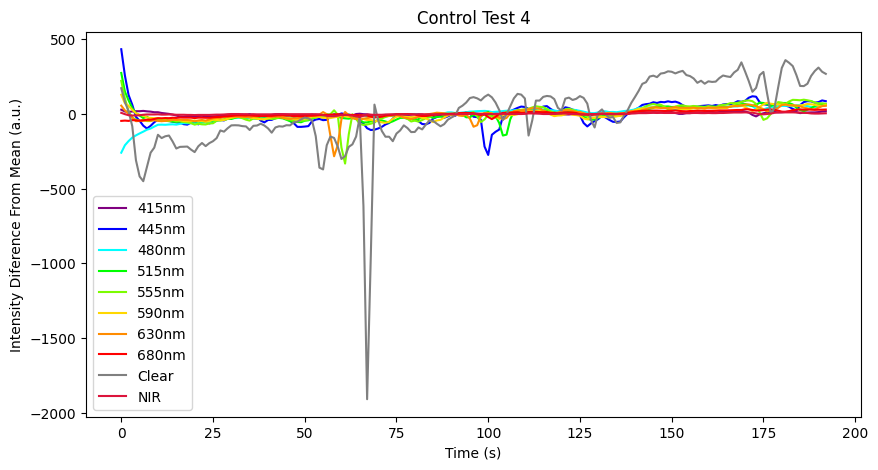

In [98]:
time = data['time'].to_list()
labels = data.columns.to_list()
jdat = data[1:].drop(columns='time').to_numpy().T
col = ['purple','blue','cyan','lime','lawngreen','gold','darkorange','red','gray','crimson']

for i in range(len(jdat)):
    mi = np.mean(jdat[i])
    for j in range(len(jdat[0])):
        jdat[i][j] = jdat[i][j] - mi

fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(jdat)):
    ax.plot(np.arange(len(jdat[0])), jdat[i], color=col[i], label=labels[i+1])
ax.legend()
plt.xlabel('Time (s)')
plt.ylabel('Intensity Diference From Mean (a.u.)')
plt.title('Control Test 4')
plt.show()
#fig.savefig('control-test-mean-4.png', facecolor=fig.get_facecolor(), edgecolor='none')




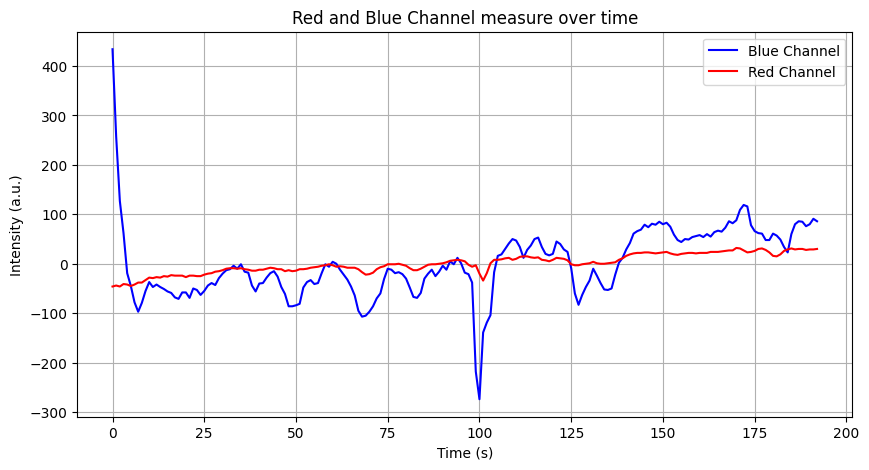

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.arange(len(jdat[0])), jdat[1], label='Blue Channel', color='blue')
ax.plot(np.arange(len(jdat[0])), jdat[7], label='Red Channel', color='red')
plt.grid()
plt.legend()
plt.title('Red and Blue Channel measure over time')
plt.xlabel('Time (s)')
plt.ylabel('Intensity (a.u.)')
plt.show()
#fig.savefig('b-vs-r.png', facecolor=fig.get_facecolor(), edgecolor='none')


In [100]:
# Control means by channel
raw_control = []

raw_control.append(pd.read_csv(path+'control-2023-03-29-tube.csv', sep=',',header=0))
raw_control.append(pd.read_csv(path+'control-2-2023-03-29-tube.csv', sep=',',header=0))

paths_list=['control-2023-03-29-tube.csv', 'blue-2023-03-29-tube.csv', 'red-2023-03-29-tube.csv',
            '1-10-blue-2023-03-29-tube.csv', '1-10-red-2023-03-29-tube.csv',
            '1-100-blue-2023-03-29-tube.csv', '1-100-red-2023-03-29-tube.csv']

def read_paths_to_list(lista: list[str]):
    return [pd.read_csv(path+file, sep=',',header=0).drop(columns='time') for file in lista]
test1 = read_paths_to_list(paths_list)


def applied_function_to_df(df: pd.DataFrame, c):
    for colum in df:
        colnum = df.columns.get_loc(colum)
        df[colum] = df[colum]/c.iloc[:, colnum].mean()
    return df


def apply_function_to_list_of_dfs(list_df: list[pd.DataFrame], c):
    for df in list_df:
        applied_function_to_df(df, c)
    return list_df

test = apply_function_to_list_of_dfs(test1[1:], test1[0])
test



[        415nm     445nm     480nm     515nm     555nm     590nm     630nm  \
 0    0.665564  0.865943  0.735451  0.595256  0.212493  0.068257  0.126749   
 1    0.660652  0.858991  0.743987  0.589628  0.211910  0.067995  0.126626   
 2    0.659248  0.856673  0.749008  0.588309  0.211545  0.067821  0.126626   
 3    0.657610  0.854033  0.751854  0.587253  0.211472  0.067646  0.126626   
 4    0.654803  0.853332  0.753695  0.586462  0.211472  0.067384  0.126626   
 ..        ...       ...       ...       ...       ...       ...       ...   
 189  0.654803  0.851554  0.769596  0.585758  0.213515  0.067821  0.127608   
 190  0.654803  0.851715  0.769093  0.585934  0.213515  0.067821  0.127608   
 191  0.655037  0.851554  0.768591  0.585934  0.213515  0.067821  0.127608   
 192  0.654803  0.851608  0.768591  0.585846  0.213661  0.067821  0.127608   
 193  0.654101  0.851500  0.768759  0.586022  0.213661  0.067821  0.127608   
 
         680nm     Clear       NIR  
 0    0.655868  0.535112 

In [122]:
def division_graphs(df, name='Graph'):
    fig, ax = plt.subplots(figsize=(10, 5))
    lab = df.columns.to_list()
    for i in range(len(df.columns)):
        ax.plot(np.arange(len(df.iloc[:, i])), df.iloc[:, i], color=col[i], label=lab[i])
    ax.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Intensity Diference From Mean (a.u.)')
    plt.title(name)
    plt.show()
    fig.savefig(name+'.png', dpi=600)
col = ['purple','blue','cyan','lime','lawngreen','gold','darkorange','red','gray','crimson']

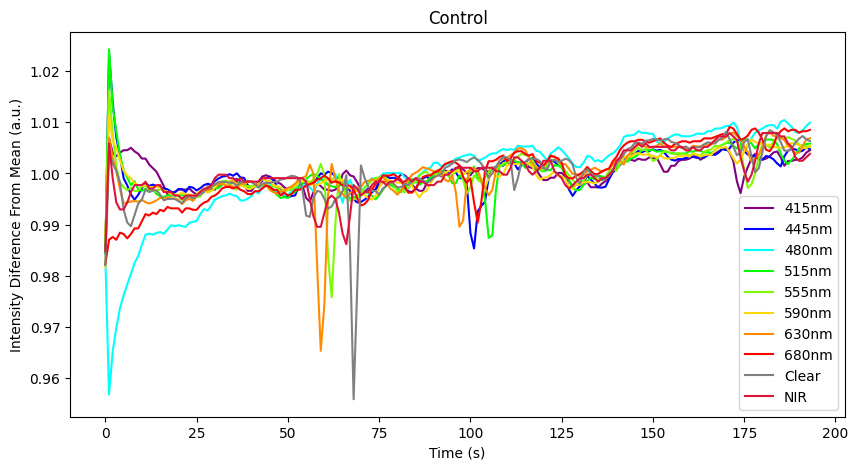

In [123]:
division_graphs(applied_function_to_df(test1[0],test1[0]), 'Control')

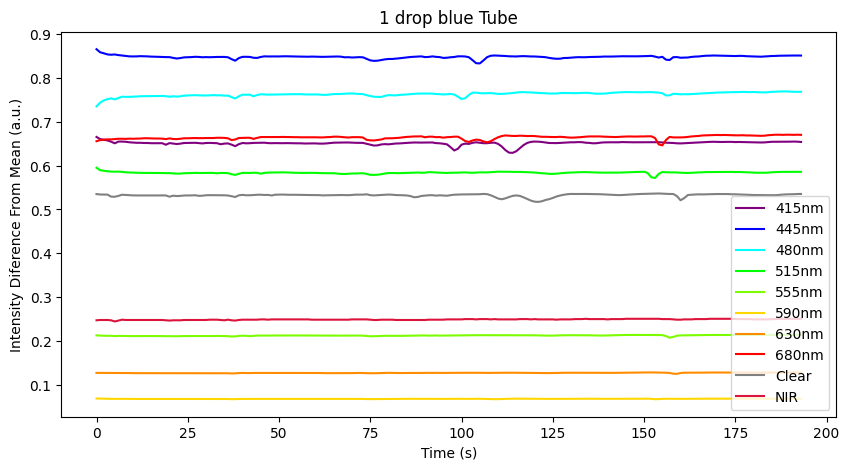

<Figure size 640x480 with 0 Axes>

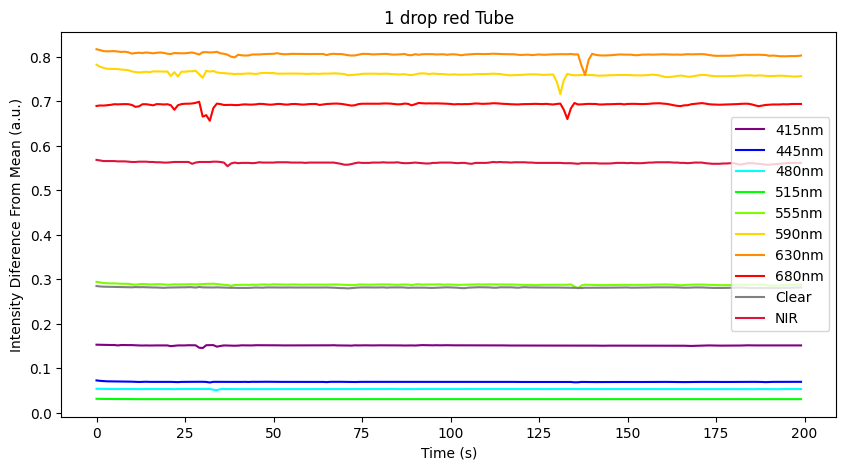

<Figure size 640x480 with 0 Axes>

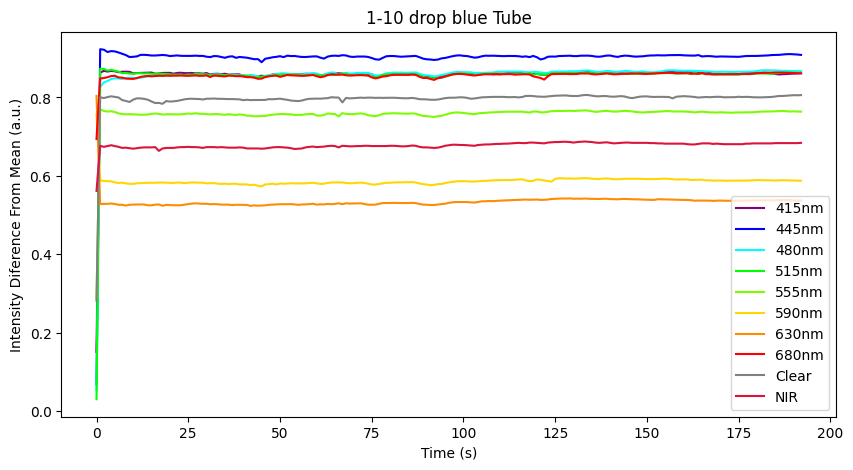

<Figure size 640x480 with 0 Axes>

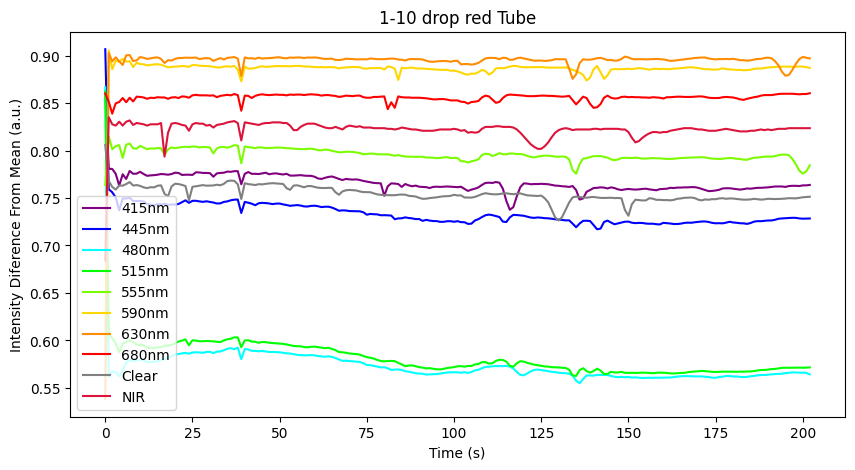

<Figure size 640x480 with 0 Axes>

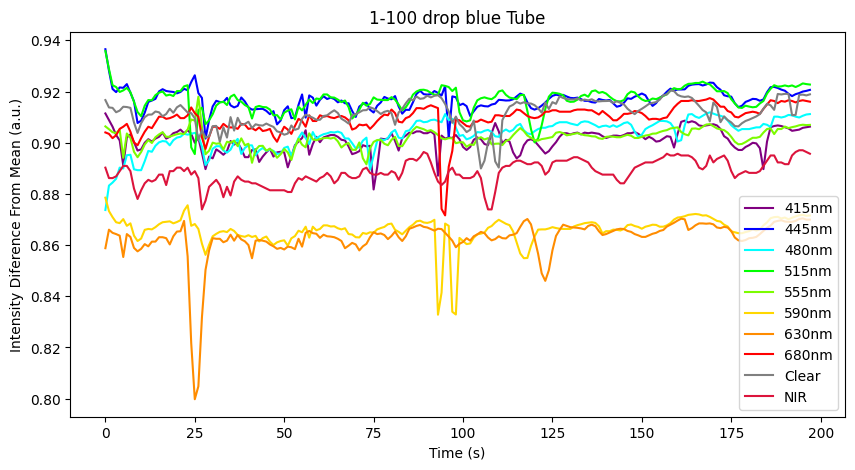

<Figure size 640x480 with 0 Axes>

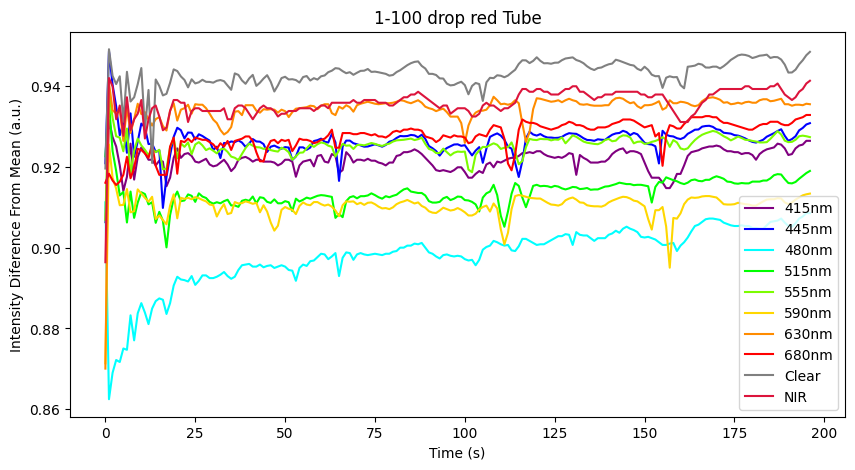

<Figure size 640x480 with 0 Axes>

In [116]:
division_graphs(test[0], '1 drop blue Tube')
division_graphs(test[1], '1 drop red Tube')
division_graphs(test[2], '1-10 drop blue Tube')
division_graphs(test[3], '1-10 drop red Tube')
division_graphs(test[4], '1-100 drop blue Tube')
division_graphs(test[5], '1-100 drop red Tube')

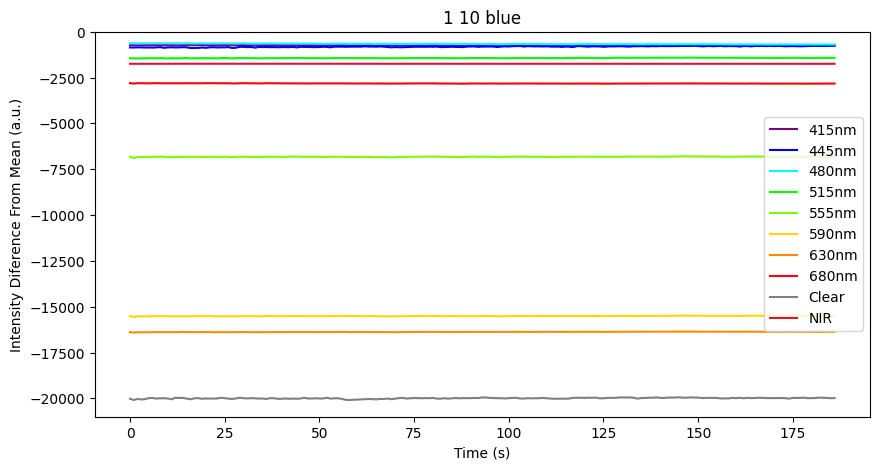

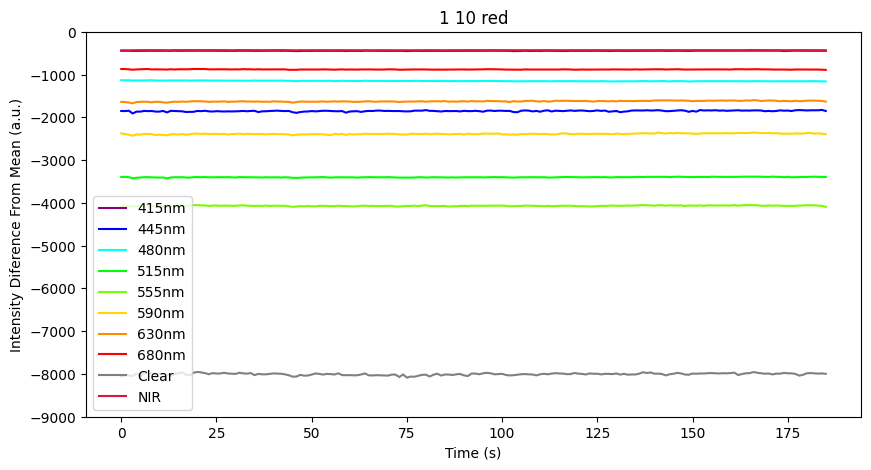

In [61]:
mean_graph(test1[2], raw_control[1], '1 10 blue', 21000)
mean_graph(test1[3], raw_control[1], '1 10 red', 9000)

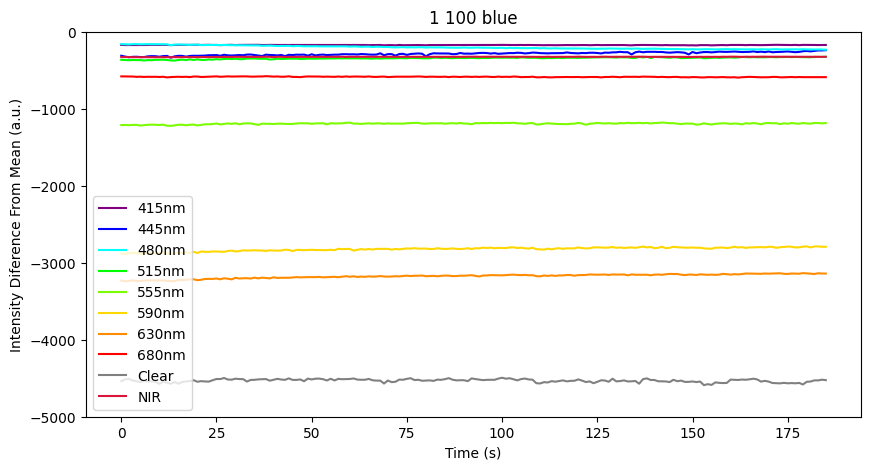

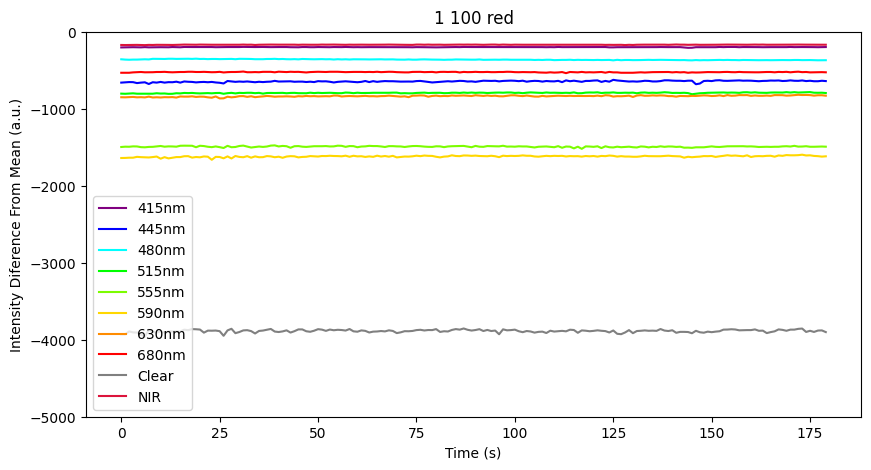

In [67]:
mean_graph(test1[4], raw_control[2], '1 100 blue', 5000)
mean_graph(test1[5], raw_control[2], '1 100 red', 5000)

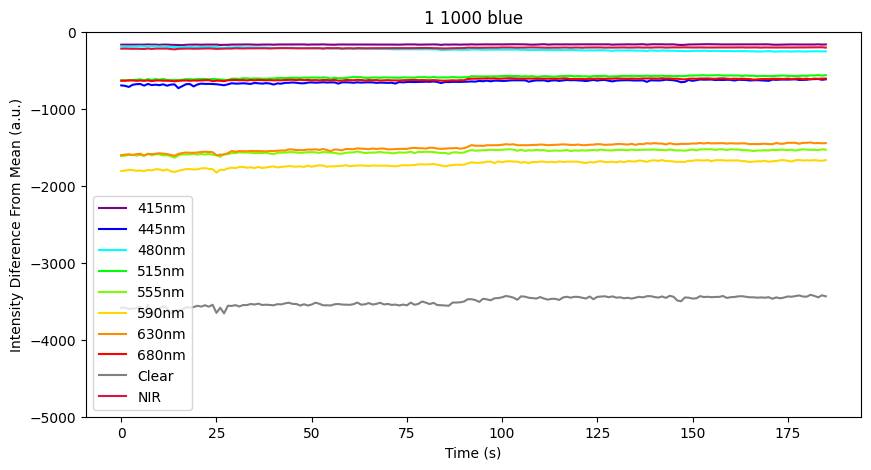

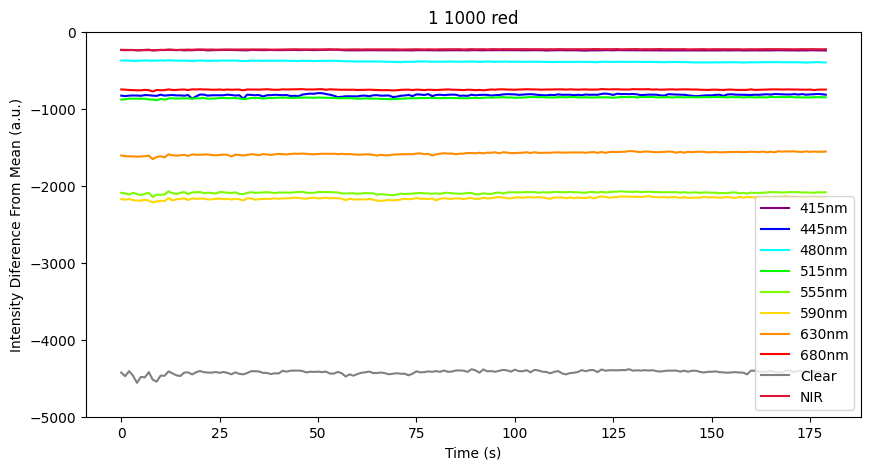

In [66]:
mean_graph(test1[6], raw_control[3], '1 1000 blue', 5000)
mean_graph(test1[7], raw_control[3], '1 1000 red', 5000)